# LAB 4 - Naive Bayes Classifier 

Demonstrate Naive Bayes Classifier. Code should implement the following on suitable dataset of your choice with more than 100 samples.
1. Naive Bayes Classifier for numeric data
2. Naive Bayes Classifier for nominal data
3. Confusion matrix and Accuracy as evaluation metric

## What is a classifier?
A classifier is a machine learning model that is used to `discriminate different objects based on certain features.`


Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

## What is Naive Bayes algorithm?

One of the supervised machine learning algorithm “Naive Bayes” mainly used for classification. It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. `In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.`  For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.  
`Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.`



### Principle of Naive Bayes Classifier:

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. It works on Bayes theorem of probability to predict the class of unknown data sets. The crux of the classifier is based on the Bayes theorem.

### Bayes Theorem:

<img src="https://miro.medium.com/max/638/1*tjcmj9cDQ-rHXAtxCu5bRQ.png">


Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.


`step1`: Import the required library.

In [25]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### `1 : Naive Bayes Classifier for numeric data`

We will be using the wine dataset from <a href='https://archive.ics.uci.edu/ml/datasets/Wine'>UCI</a>

let's read the dataset.

In [8]:
wine_df = pd.read_csv('Wine.csv')

let's check the head of the dataset.

In [9]:
wine_df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Let's take name of the column from the `UCI`. and renname the columns.

In [10]:
wine_df.columns = [  'class'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

In [11]:
wine_df.head()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


As I mention before that Naive Bayes is supervised machine learning algorithm mainly used for classification. we will be using Naive Bayes algorithm for the wine dataset and classify it. 

In [14]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                177 non-null    int64  
 1   alcohol              177 non-null    float64
 2   malicAcid            177 non-null    float64
 3   ash                  177 non-null    float64
 4   ashalcalinity        177 non-null    float64
 5   magnesium            177 non-null    int64  
 6   totalPhenols         177 non-null    float64
 7   flavanoids           177 non-null    float64
 8   nonFlavanoidPhenols  177 non-null    float64
 9   proanthocyanins      177 non-null    float64
 10  colorIntensity       177 non-null    float64
 11  hue                  177 non-null    float64
 12  od280_od315          177 non-null    float64
 13  proline              177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


we have `14` columns and the datatype of all the columns are numrical values.

Let's check for null values.

In [16]:
wine_df.isnull().sum()

class                  0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

we don't have any null values.

Let's check the genral statistic of the dataset.

In [17]:
wine_df.describe()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [18]:
columns = wine_df.columns

## Number of labels: cardinality
The number of labels within each attribute is known as `cardinality`. A high number of labels within a variable is known as `high cardinality.` High cardinality may pose some serious problems in the machine learning model.

In [20]:
for col in columns:
     print(col, 'contains', len(wine_df[col].unique()),'lables.')

class contains 3 lables.
alcohol contains 125 lables.
malicAcid contains 133 lables.
ash contains 78 lables.
ashalcalinity contains 62 lables.
magnesium contains 52 lables.
totalPhenols contains 97 lables.
flavanoids contains 131 lables.
nonFlavanoidPhenols contains 39 lables.
proanthocyanins contains 101 lables.
colorIntensity contains 131 lables.
hue contains 78 lables.
od280_od315 contains 121 lables.
proline contains 121 lables.


## Declare feature vector and target variable

In [21]:
x = wine_df.drop(['class'],axis=1)
y = wine_df['class']

In [22]:
x.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: class, Length: 177, dtype: int64

### Split data into separate training and test set

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((123, 13), (54, 13))

## Feature Scaling 

`Feature scaling is a method used to normalize the range of independent variables or features of data.` In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [27]:
col = x_train.columns

In [34]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [37]:
x_train[:3]

array([[-0.15936255, -0.15181518,  0.43243243, -0.39534884, -0.10810811,
         0.15763547,  0.15426997, -0.45714286, -0.14184397, -0.22296173,
         0.4057971 ,  0.68825911,  0.84691358],
       [-1.14741036, -0.31683168,  0.91891892,  0.11627907, -0.16216216,
         0.4137931 ,  0.45730028, -0.28571429,  1.31914894, -0.64891847,
         0.02898551,  0.38866397,  0.01975309],
       [ 0.1752988 ,  1.61716172, -0.27027027,  0.11627907,  1.24324324,
        -0.71921182, -0.77134986,  0.51428571, -0.29787234,  1.86356073,
        -1.04347826, -0.98785425,  0.40246914]])

In [39]:
x_test[:3]

array([[ 0.37313433, -0.14054054,  0.24193548,  0.30526316,  0.86746988,
         0.52      ,  0.43280977, -0.74285714,  1.17365269,  0.42519685,
        -0.05084746,  0.18585859,  0.77955825],
       [-0.20149254,  0.53693694,  0.30645161,  0.62105263,  0.6746988 ,
        -0.79555556, -0.55846422, -0.51428571, -0.25149701,  1.85826772,
        -1.74576271, -1.07474747, -0.32914682],
       [-0.6641791 , -0.34234234,  0.46774194, -0.01052632,  0.28915663,
        -0.43111111, -0.28621291,  0.68571429, -0.52694611, -0.61417323,
         1.54237288, -0.46060606, -0.54569078]])

In [40]:
x_train = pd.DataFrame(x_train, columns=[col])

In [41]:
x_train.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,-0.159363,-0.151815,0.432432,-0.395349,-0.108108,0.157635,0.154270,-0.457143,-0.141844,-0.222962,0.405797,0.688259,0.846914
1,-1.147410,-0.316832,0.918919,0.116279,-0.162162,0.413793,0.457300,-0.285714,1.319149,-0.648918,0.028986,0.388664,0.019753
2,0.175299,1.617162,-0.270270,0.116279,1.243243,-0.719212,-0.771350,0.514286,-0.297872,1.863561,-1.043478,-0.987854,0.402469
3,0.087649,1.148515,-0.567568,0.348837,0.270270,-0.807882,-0.848485,0.514286,-0.368794,-0.199667,-1.014493,-0.890688,0.390123
4,0.350598,-0.112211,-0.324324,1.046512,-0.540541,-0.433498,-0.137741,-0.400000,-0.751773,-0.286190,0.086957,0.000000,-0.493827


In [42]:
x_test = pd.DataFrame(x_test,columns=[col])

In [43]:
x_test.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,0.373134,-0.140541,0.241935,0.305263,0.867470,0.520000,0.432810,-0.742857,1.173653,0.425197,-0.050847,0.185859,0.779558
1,-0.201493,0.536937,0.306452,0.621053,0.674699,-0.795556,-0.558464,-0.514286,-0.251497,1.858268,-1.745763,-1.074747,-0.329147
2,-0.664179,-0.342342,0.467742,-0.010526,0.289157,-0.431111,-0.286213,0.685714,-0.526946,-0.614173,1.542373,-0.460606,-0.545691
3,0.865672,-0.162162,-0.274194,-0.578947,0.963855,0.733333,0.586387,-0.400000,0.670659,0.466142,-0.186441,0.412121,0.519706
4,-0.888060,1.718919,0.016129,0.410526,-0.771084,0.431111,0.607330,-0.685714,1.724551,-0.661417,-0.830508,0.678788,-0.502382


#### We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

## Model training

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train,y_train)

GaussianNB()

## Predict the results

In [46]:
y_pred = gnb.predict(x_test)

In [47]:
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 2, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 2, 3], dtype=int64)

## Check accuracy score
Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [48]:
from sklearn.metrics import accuracy_score

In [52]:
len(y_test)

54

In [53]:
len(y_pred)

54

In [54]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9444


Model accuracy is `94%`.

Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [56]:
y_pred_train = gnb.predict(x_train)
y_pred_train

array([1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1,
       1, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1,
       2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2,
       1, 3, 2, 3, 1, 3, 3, 3, 1, 2, 3, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1,
       2, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3], dtype=int64)

In [57]:
print("Training-set accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score: 0.9837


### Check for overfitting and underfitting

In [58]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.9837
Test set score: 0.9444


The training-set accuracy score is `0.9837` while the test-set accuracy to be `0.9444`. These two values are quite comparable. So, there is no sign of overfitting.

### Compare model accuracy with null accuracy
So, the model accuracy is 0.9444. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [66]:
y_train.value_counts()

2    50
1    39
3    34
Name: class, dtype: int64

In [59]:
y_test.value_counts()

2    21
1    19
3    14
Name: class, dtype: int64

We can see that the occurences of most frequent class is 21. So, we can calculate null accuracy by dividing 21 by total number of occurences.

In [68]:
# check null accuracy score

null_accuracy = (21/(21+19+14))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.3889


We can see that our model accuracy score is 0.9444 but null accuracy score is 0.3889. So, we can conclude that our Gaussian Naive Bayes Classification model is not doing a very good job in predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called `Confusion matrix` that comes to our rescue.

## Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

- `True Positives (TP)` – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- `True Negatives (TN)` – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- `False Positives (FP)` – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called `Type I error.`

- `False Negatives (FN)` – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called `Type II error`.

These four outcomes are summarized in a confusion matrix given below.


In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
cm = confusion_matrix(y_test,y_pred)

<img src='https://miro.medium.com/max/1400/1*UlaGXdKNA-i4eqvNVfCY9Q.png'>

In [73]:
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[17  2  0]
 [ 0 20  1]
 [ 0  0 14]]


In [81]:
y_test.value_counts()

2    21
1    19
3    14
Name: class, dtype: int64

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Multiclass-confusion-matrix.png">

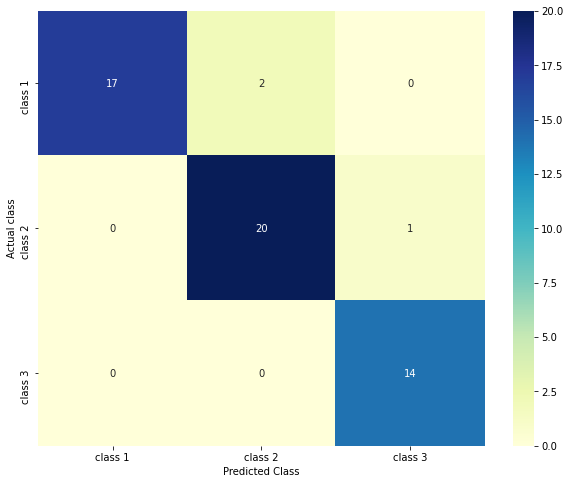

In [87]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(10,8))
cm_matrix = pd.DataFrame(data=cm, columns=['class 1', 'class 2','class 3'], 
                                 index=['class 1', 'class 2','class 3'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()

## Naive Bayes Classifier for nominal data

We will be using the `Car Dataset` you can find the complete description and information about this data 

<a hre='https://archive.ics.uci.edu/ml/datasets/Car+Evaluation'>UCI</a> https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

let's read the dataset from the uci. 

In [92]:
car_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',header=None)

Let's chekc the head of the dataset.

In [93]:
car_df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


let's give proper name to the columns.

In [95]:
car_df.columns = ['buying','maint','doors','persons','lug_boo','safety','Class']

In [96]:
car_df.head()

,buying,maint,doors,persons,lug_boo,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


The model evaluates cars according to the following concept structure:
<img src='carpic.png'>   

## class
- unacc / Unacceptable
- acc / Acceptable
- good
- v-good / Very good

Let's check for missing values.

In [98]:
car_df.isnull().sum()

buying     0
maint      0
doors      0
persons    0
lug_boo    0
safety     0
Class      0
dtype: int64

we don't have any null values.

In [100]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   buying   1728 non-null   object
 1   maint    1728 non-null   object
 2   doors    1728 non-null   object
 3   persons  1728 non-null   object
 4   lug_boo  1728 non-null   object
 5   safety   1728 non-null   object
 6   Class    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


we can see that all attribute are nominal datatype.

## Number of labels: cardinality

In [109]:
columns = car_df.columns
for col in columns:
     print(col, 'contains', len(car_df[col].unique()),'lables.')

buying contains 4 lables.
maint contains 4 lables.
doors contains 4 lables.
persons contains 3 lables.
lug_boo contains 3 lables.
safety contains 3 lables.
Class contains 4 lables.


## Declare feature vector and target variable

In [128]:
x = car_df.drop(['Class'],axis=1)
y = car_df['Class']

In [129]:
x

,buying,maint,doors,persons,lug_boo,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [130]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Class, Length: 1728, dtype: object

## Split data into separate training and test set

In [131]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((1209, 6), (519, 6))

In [133]:
x_train.head(2)

,buying,maint,doors,persons,lug_boo,safety
580,high,high,3,4,med,med
1214,med,low,2,more,big,high


In [134]:
x_test.head(2)

,buying,maint,doors,persons,lug_boo,safety
1318,low,vhigh,2,more,med,med
124,vhigh,high,2,4,big,med


## Encode dataset catagorical attribute.

## One Hot Encoding

One hot encoding is a `process by which categorical` variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

<img src = "https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W.">

Example of One hot encoding.

<img src="https://i.imgur.com/mtimFxh.png">

In [135]:
# import category encoders
import category_encoders as ce

In [137]:
encoder = ce.OneHotEncoder(cols= ['buying', 'maint', 'doors', 'persons', 'lug_boo', 'safety'])

In [138]:
encoder

OneHotEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boo', 'safety'])

In [139]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

C:\Users\nijat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [140]:
x_train

,buying_1,buying_2,buying_3,buying_4,maint_1,maint_2,maint_3,maint_4,doors_1,doors_2,...,doors_4,persons_1,persons_2,persons_3,lug_boo_1,lug_boo_2,lug_boo_3,safety_1,safety_2,safety_3
580,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1214,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1665,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
661,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
587,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1216,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
1653,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
559,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

## Feature Scaling

In [141]:
col = x_train.columns

In [142]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [143]:
x_train

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [144]:
x_train = pd.DataFrame(x_train, columns=[col])
x_test = pd.DataFrame(x_test, columns=[col])

In [145]:
x_train

,buying_1,buying_2,buying_3,buying_4,maint_1,maint_2,maint_3,maint_4,doors_1,doors_2,...,doors_4,persons_1,persons_2,persons_3,lug_boo_1,lug_boo_2,lug_boo_3,safety_1,safety_2,safety_3
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1205,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1206,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1207,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

## Model training

In [146]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
gnb = GaussianNB()

# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

## Predict the results

In [149]:
y_pred = gnb.predict(x_test)

In [151]:
y_pred[:5]

array(['acc', 'acc', 'unacc', 'unacc', 'unacc'], dtype='<U5')

## Check accuracy score

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7881


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

## Compare the train-set and test-set accuracy


In [155]:
y_pred_train = gnb.predict(x_train)
y_pred_train

array(['acc', 'vgood', 'unacc', ..., 'unacc', 'acc', 'unacc'], dtype='<U5')

In [156]:
print("Training-set accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score: 0.8089


## Check for overfitting and underfitting

In [157]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8089
Test set score: 0.7881


The training-set accuracy score is 0.7881 while the test-set accuracy to be 0.8089. These two values are quite comparable. So, there is no sign of overfitting.

### Compare model accuracy with null accuracy

So, the model accuracy is 0.7881. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [158]:
y_test.value_counts()

unacc    363
acc      115
good      25
vgood     16
Name: Class, dtype: int64

We can see that the occurences of most frequent class is unacc. So, we can calculate null accuracy by dividing 363 by total number of occurences

In [161]:
# check null accuracy score

null_accuracy = (363/(363+115+25+16))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6994


We can see that our model accuracy score is  `0.7881` but null accuracy score is `0.6994`. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

## Confusion matrix

In [163]:
cm = confusion_matrix(y_test,y_pred)

In [165]:
y_test.value_counts()

unacc    363
acc      115
good      25
vgood     16
Name: Class, dtype: int64

In [164]:
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 86  23   0   6]
 [  0  21   0   4]
 [ 77   0 286   0]
 [  0   0   0  16]]


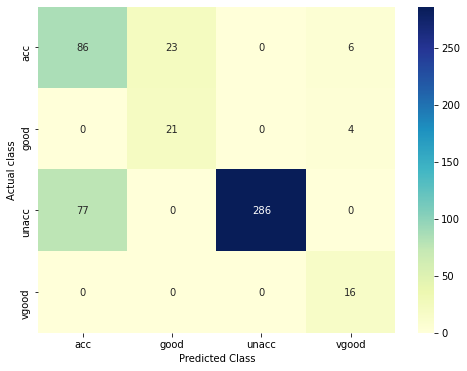

In [168]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(8,6))
cm_matrix = pd.DataFrame(data=cm, columns=['acc', 'good','unacc','vgood'], 
                                 index=['acc', 'good','unacc','vgood'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()

# Mansoor Nijatullah